#### Análisis Exploratorio y Curación de Datos:

# LABORATORIO: LIMPIAR UN SET DE DATOS CON PANDAS

<p><em>Consigna:</em></p>
<p>Limpiar un set de datos con pandas</p>
<ul>
<li>Un set de datos que tengan permisos para compartir con nosotros</li>
<li>M&aacute;s de 100000 registros</li>
<li>M&aacute;s de 20 columnas</li>
<li>Con datos con cadenas, n&uacute;meros, fechas, y categor&iacute;as</li>
</ul>
<p>

<ol>
    <li>Importando los datos</li>
        <ol>
            <li> Verificar si no hay problemas en la importación Habilitar chequeos al importar </li>
            <li> Asegurar de tener ids/claves únicas Chequear que no hay datos duplicados </li>
            <li> Despersonalizar datos y guardarlos en un nuevo archivo</li>
            <li> Nunca modificar los datos crudos u originales</li>
        </ol>
    <li>Pasos necesarios</li>
        <ol>
            <li>Etiquetas de variables/columnas: no usar caracteres especiales Verificar que no haya problemas de codificación/encoding </li>
            <li> Tratar valores faltantes Quitar o imputar</li>
            <li> Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas</li>
            <li> No cambiar los nombres de las variables de la fuente de origen</li>
            <li> Verificar la consistencia de las variables
Aplicar reglas de integridad</li>
            <li> Identificar y documentar valores atípicos/outliers
Calcular estadísticos</li>
            <li> Evaluar cómo comprimir los datos para su almacenamiento más eficiente</li>
            <li> Guardar el set de datos con un nombre informativo.</li>
        </ol>
    <li> Pasos deseables</li>
    <ol>
        <li> Ordenar variables/columnas si es posible – primero ID, luego en el mismo orden que la fuente</li>
        <li> Quitar variables/columnas que no tienen información a analizar</li>
        <li> Renombrar variables de grillas</li>
        <li> Categorizar resultados en “Otros”
Si tiene un campo de texto libre asociado, codificar en nuevos valores de la variable
categórica asociada. Revisar fuzzyness.</li>
        <li> Agregar metadata a los datos: cuando y como fueron obtenidos, limpieza realizada,
asunciones, etc
Vincular con etiquetas del código fuente y los datos. Al menos incluir un README.</li>
    <ol>
</ol>
</p>

---

In [1]:
# Inicialmente cargamos las librerías a utilizar:
import os.path as path
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pylab import rcParams
from sklearn import preprocessing


rcParams['figure.figsize'] = 18, 10
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


# Limpiar un set de datos con pandas:
Ejecutamos los pasos planteados:


# 1. Importando los datos:

# 1.A. Verificar si no hay problemas en la importación Habilitar chequeos al importar

In [2]:
# Nota: El dataset se encuentra comprimido por un tema de volumen. 
# Esta rutina chequea su existencia en formato descomprimido y lo extrae en caso de no existir. 
dataset_filename = './datos/datos-anonimizados-clientes.csv'

if path.isfile(dataset_filename) == False:
    zip = zipfile.ZipFile('./datos/datos-anonimizados-clientes.zip')
    zip.extractall('./datos/')
    print('Dataset extraido. Continuamos.')
else:
    print('El dataset existe. Continuamos.')


El dataset existe. Continuamos.


In [3]:
# No especificamos columna indice, porque no tenemos una columna con datos unicos
ventas_df = pd.read_csv(dataset_filename)

/Users/facundo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12,15,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
ventas_df.dtypes

Unnamed: 0                 int64
CODIGO_CLIENTE            object
RAZON_SOCIAL              object
CUIT                      object
CATEGORIA_IVA             object
GRUPO_CANAL                int64
CANAL                      int64
SUBCANAL                   int64
APERTURA_ADICIONAL         int64
CATEGORIA                 object
ZONA                       int64
ZONA_REPARTO               int64
CONDICION_VENTA           object
CREDITO_MAXIMO           float64
CREDITO_MONEDA            object
LISTA_PRECIOS             object
AGENTE_RETENCION            bool
DIAS_TOLERANCIA_COBRO      int64
GRUPO                      int64
SOCIEDAD_JURIDICA         object
ESTADO                    object
MOTIVO_ESTADO             object
ESQUEMA_COMERCIAL         object
FACTURA_CODIGO            object
FACTURA_NUM_ID            object
FACTURA_SUCURSAL           int64
FACTURA_FECHA             object
FACTURA_MONTO_TOTAL      float64
FACTURA_COND_VENTA        object
FACTURA_VENDEDOR           int64
CODIGO_ART

Para salvar el warning, definiremos los tipos de datos de cada columna:

In [5]:
ventas_df_dtype={'CODIGO_CLIENTE': object,
 'RAZON_SOCIAL':  object,
 'CUIT': object,
 'CATEGORIA_IVA': object,
 'GRUPO_CANAL': object,
 'CANAL': object,
 'SUBCANAL': object,
 'APERTURA_ADICIONAL': object,
 'CATEGORIA': object,
 'ZONA': object,
 'ZONA_REPARTO': object,
 'CONDICION_VENTA': object,
 'CREDITO_MAXIMO': np.dtype('f'),
 'CREDITO_MONEDA': object,
 'LISTA_PRECIOS': object,
 'AGENTE_RETENCION': np.dtype('?'),
 'DIAS_TOLERANCIA_COBRO': np.dtype('i'),
 'GRUPO': object,
 'SOCIEDAD_JURIDICA': object,
 'ESTADO': object,
 'MOTIVO_ESTADO': object,
 'ESQUEMA_COMERCIAL': object,
 'DIRECCION_CALLE': object,
 'DIRECCION_NUMERO': object,
 'CODIGO_POSTAL': object,
 'LATITUD': np.dtype('f'),
 'LONGITUD': np.dtype('f') ,
 'DIRECCION_PRINCIPAL': object,
 'FACTURA_CODIGO': object,
 'FACTURA_NUMERO': np.dtype('i'),
 'FACTURA_SUCURSAL': np.dtype('i'),
 'FACTURA_FECHA': object,
 'FACTURA_MONTO_TOTAL': np.dtype('f'),
 'FACTURA_COND_VENTA': object,
 'FACTURA_VENDEDOR': object,
 'CODIGO_ARTICULO': object,
 'DESCRIPCION': object,
 'AGRUPACION_1': object,
 'AGRUPACION_2': object,
 'AGRUPACION_3': object,
 'AGRUPACION_4': object,
 'AGRUPACION_5': object,
 'AGRUPACION_6': object,
 'CANTIDAD': np.dtype('d'),
 'UNIDAD_MEDIDA': object,
 'PRECIO_UNITARIO': np.dtype('d'),
 'PRECIO_TOTAL' : np.dtype('d')}


In [6]:
# Cargamos los datos nuevamente y observamos si aparece el Warning:
ventas_df = pd.read_csv("./datos/datos-anonimizados-clientes.csv",
                        dtype=ventas_df_dtype)

Obtenemos el tamaño del dataframe en filas y columnas, y verificamos si el set de datos es adecuado para el ejercicio:

In [7]:
cant_filas = len(ventas_df)
cant_columnas = len(ventas_df.columns)

if (cant_filas > 100000) & (cant_columnas > 20):
    display(HTML('<H3>NOTA: El set de datos posee {0:,.0f} filas por {1} columnas, lo cual lo hace adecuado para el ejercicio.</h3>'.format(cant_filas,cant_columnas)))
else: 
    display(HTML('<H3>ERROR: El set de datos posee {0:,.0f} filas por {1} columnas, lo cual NO lo hace adecuado para el ejercicio.</h3>'.format(cant_filas,cant_columnas)))

# 1.B. Asegurar de tener ids/claves únicas Chequear que no hay datos duplicados

In [8]:
ventas_df.dtypes

Unnamed: 0                 int64
CODIGO_CLIENTE            object
RAZON_SOCIAL              object
CUIT                      object
CATEGORIA_IVA             object
GRUPO_CANAL               object
CANAL                     object
SUBCANAL                  object
APERTURA_ADICIONAL        object
CATEGORIA                 object
ZONA                      object
ZONA_REPARTO              object
CONDICION_VENTA           object
CREDITO_MAXIMO           float32
CREDITO_MONEDA            object
LISTA_PRECIOS             object
AGENTE_RETENCION            bool
DIAS_TOLERANCIA_COBRO      int32
GRUPO                     object
SOCIEDAD_JURIDICA         object
ESTADO                    object
MOTIVO_ESTADO             object
ESQUEMA_COMERCIAL         object
FACTURA_CODIGO            object
FACTURA_NUM_ID            object
FACTURA_SUCURSAL           int32
FACTURA_FECHA             object
FACTURA_MONTO_TOTAL      float32
FACTURA_COND_VENTA        object
FACTURA_VENDEDOR          object
CODIGO_ART

In [9]:
ventas_df.head()

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,01,999,07,0.00,PES,20,False,0,0000005100,S,N,NaN,Desdoble,FCBC,297574e436e7466386da63886436195b,46,2017-01-02 00:00:00,38.70,07,040,000-000-6673,012,122,253,012,080,001,1.00,UN,21.55,26.08
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,01,999,07,0.00,PES,20,False,0,0000005100,S,N,NaN,Desdoble,FCBC,297574e436e7466386da63886436195b,46,2017-01-02 00:00:00,38.70,07,040,000-000-11000,012,425,700,012,080,001,1.00,UN,10.43,12.62
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,15,999,14,0.00,PES,08,False,0,0000010572,N,N,NaN,Desdoble,FA,44cd8f14e89c775c390d2d282735057a,207,2017-01-02 00:00:00,225.88,07,052,000-000-9800,003,185,220,003,033,001,6.00,UN,15.04,109.16
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,15,999,14,0.00,PES,08,False,0,0000010572,N,N,NaN,Desdoble,FA,44cd8f14e89c775c390d2d282735057a,207,2017-01-02 00:00:00,225.88,07,052,000-000-6742,091,034,101,003,021,001,12.00,UN,8.04,116.72
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,RM,000,010,010,010,A,01,999,07,"2,450.80",PES,03,False,0,0000000539,N,N,NaN,Experto + Desdoble,FB,e9db0c1d04bba69d87e81808c012272a,207,2017-01-02 00:00:00,104.13,07,026,000-000-11557,012,302,402,012,126,001,6.00,UN,14.34,104.13


In [10]:
ventas_df.tail()

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
1677675,1677675,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,15,999,07,0.00,PES,03,False,0,0000005000,S,N,NaN,Desdoble,FCBC,7973ef5689391c76f0a087453f67f0ea,46,2018-02-28 00:00:00,936.07,07,020,000-000-6803,075,545,932,012,077,001,2.00,UN,21.91,53.01
1677676,1677676,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,15,999,07,0.00,PES,03,False,0,0000005000,S,N,NaN,Desdoble,FCBC,7973ef5689391c76f0a087453f67f0ea,46,2018-02-28 00:00:00,936.07,07,020,000-000-6805,012,355,575,012,076,001,3.00,UN,18.74,68.01
1677677,1677677,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,15,999,07,0.00,PES,03,False,0,0000005000,S,N,NaN,Desdoble,FCBC,7973ef5689391c76f0a087453f67f0ea,46,2018-02-28 00:00:00,936.07,07,020,000-000-11585,010,275,432,010,061,001,2.00,UN,11.96,28.96
1677678,1677678,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,15,999,07,0.00,PES,03,False,0,0000005000,S,N,NaN,Desdoble,FCBC,7973ef5689391c76f0a087453f67f0ea,46,2018-02-28 00:00:00,936.07,07,020,000-000-11569,010,345,138,010,078,001,6.00,UN,6.67,48.45
1677679,1677679,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,15,999,07,0.00,PES,03,False,0,0000005000,S,N,NaN,Desdoble,FCBC,7973ef5689391c76f0a087453f67f0ea,46,2018-02-28 00:00:00,936.07,07,020,000-000-5312,010,265,380,010,061,001,5.00,UN,9.97,60.32


### Verificamos si el campo CODIGO_CLIENTE es único:

In [11]:
if ventas_df['CODIGO_CLIENTE'].size == ventas_df['CODIGO_CLIENTE'].unique().size:
    print("CODIGO_CLIENTE Unique")
else:
    print("CODIGO_CLIENTE Not unique")

CODIGO_CLIENTE Not unique


### El CODIGO_CLIENTE no es único, revisamos el resto de los campos:

In [12]:
display(HTML('<h2>CANTIDAD DE REGISTROS = '+ str(len(ventas_df )) + '</h2>'))

Verificamos si algun campo posee la misma cantidad de campos unicos.

In [13]:
ventas_df.describe(include='all')

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
count,"1,677,680.00",1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,1677680,"1,677,680.00",1674748,1677680,1677680,"1,677,680.00",1677680,1674378,1677680,83418,1665360,1677680,1677680,"1,677,680.00",1677680,"1,677,680.00",1677680,1677680,1677680,1677680,1675594,1676085,1677680,1676196,1677680,"1,677,680.00",1677680,"1,677,680.00","1,677,680.00"
unique,nan,2508,2458,2124,6,2,6,22,27,5,5,1,6,nan,3,22,2,nan,2418,2,2,2,7,8,154083,nan,349,nan,11,22,1980,12,181,319,6,84,3,nan,3,nan,nan
top,nan,65f982b05dba94f8565335eecb46e4da,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,000,000,000,A,15,999,00,nan,PES,03,False,nan,0000000017,N,N,CN,Desdoble,FB,7518a0340107646a1c1fc027b5cbe921,nan,2017-06-21 00:00:00,nan,00,035,000-000-6805,001,050,050,012,061,001,nan,UN,nan,nan
freq,nan,27077,61505,141045,877537,1506486,586543,586543,586543,488694,1049450,1677680,1240532,nan,1668133,753063,1516981,nan,83404,1161427,1594262,79205,990428,917064,85,nan,8856,nan,1189400,166394,21826,426036,79750,60936,706084,146118,1663071,nan,1127573,nan,nan
mean,"838,839.50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,894.64",NaN,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.00,NaN,"1,949.41",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.82,NaN,31.95,158.59
std,"484,304.64",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"19,153.05",NaN,NaN,NaN,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.54,NaN,"13,502.18",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.29,NaN,173.90,"1,957.43"
min,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,NaN,0.00,0.00
25%,"419,419.75",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377.18,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,621.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,9.13,45.27
50%,"838,839.50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,027.47",NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,"1,072.40",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,NaN,14.45,72.38
75%,"1,258,259.25",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,712.86",NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.00,NaN,"1,758.25",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,NaN,44.46,124.73


In [14]:
display(HTML('<h2>CANTIDAD DE CLAVES UNICAS EN PRIMER CAMPO = '+ str(ventas_df['Unnamed: 0'].unique().size) + '</h2>'))

#### Por lo tanto, usaremos la primer columna como indice para identificarla univocamente:

In [15]:
ventas_df.rename(columns={'Unnamed: 0':'indice'}, inplace=True)
if ventas_df['indice'].size == ventas_df['indice'].unique().size:
    print("indice Unique")
else:
    print("indice Not unique")

indice Unique


# 1.C. Despersonalizar datos y guardarlos en un nuevo archivo

Los datos que identifican a la persona estan en los campos CODIGO_CLIENTE, RAZON_SOCIAL Y CUIT. Tales campos fueron previamente despersonalizados como condición para poder ser usado en el ejercicio.
De cualquier manera, explicamos que una forma de despersonalizarlo, es usar un encoding MD5.

# 1.D. Nunca modificar los datos crudos u originales

Los datos modificados son guardados mas adelante bajo el nombre de 'datos-revisados-clientes.csv'. Nunca se pisa el archivo original ni comprimido ni descomprimido.

In [16]:
ventas_df.to_csv('./datos/datos-revisados-clientes.csv')

---

# 2 - Pasos necesarios
# 2.A. Etiquetas de variables/columnas: no usar caracteres especiales Verificar que no haya problemas de codificación/encoding

In [17]:
ventas_df.dtypes

indice                     int64
CODIGO_CLIENTE            object
RAZON_SOCIAL              object
CUIT                      object
CATEGORIA_IVA             object
GRUPO_CANAL               object
CANAL                     object
SUBCANAL                  object
APERTURA_ADICIONAL        object
CATEGORIA                 object
ZONA                      object
ZONA_REPARTO              object
CONDICION_VENTA           object
CREDITO_MAXIMO           float32
CREDITO_MONEDA            object
LISTA_PRECIOS             object
AGENTE_RETENCION            bool
DIAS_TOLERANCIA_COBRO      int32
GRUPO                     object
SOCIEDAD_JURIDICA         object
ESTADO                    object
MOTIVO_ESTADO             object
ESQUEMA_COMERCIAL         object
FACTURA_CODIGO            object
FACTURA_NUM_ID            object
FACTURA_SUCURSAL           int32
FACTURA_FECHA             object
FACTURA_MONTO_TOTAL      float32
FACTURA_COND_VENTA        object
FACTURA_VENDEDOR          object
CODIGO_ART

Los nombres de las columnas fueron verificados al espeficar el tipo de datos y no contienen caracteres especiales.
La razón social es era la unica variable suceptible a contener caracteres especiales pero, se le aplicó la funcion para despersonalizar los nombres. 
La otra variable que puede llegar a tener caracteres especiales es ESQUEMA_COMERCIAL:

In [18]:
import ftfy.badness as bad

def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

db_copy = ventas_df
db_copy['bad_char'] = ventas_df['ESQUEMA_COMERCIAL'].apply(weird)

In [19]:
# Verificamos si posee alguna linea con caracteres especiales en esa columna
db_copy[db_copy['bad_char'] > 1]
# No devolvió filas, por lo tanto no cuenta con caracteres especiales

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL,bad_char


# 2.B. Tratar valores faltantes Quitar o imputar


In [20]:
missing_values_count = ventas_df.isnull().sum()
missing_values_count[missing_values_count > 0]

CREDITO_MONEDA          2932
SOCIEDAD_JURIDICA       3302
MOTIVO_ESTADO        1594262
ESQUEMA_COMERCIAL      12320
AGRUPACION_2            2086
AGRUPACION_3            1595
AGRUPACION_5            1484
dtype: int64

Solo las columnas AGRUPACION_* tienen valores en nulo. Esas columnas representan categorias y sub categorias y grupos de productos. veamos que % del total representan esas filas, si es menor al 1% podriamos eliminarlas.

In [21]:
len(ventas_df.dropna())/len(ventas_df)

0.04945460397692051

In [16]:
# son menos del 1% por lo tanto vamos a removerlas.
ventas_df = ventas_df.dropna()

# 2.C. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas


In [18]:
# Verificamos que los datos de las columnas categoricas han sido correctamente codificados.
ventas_df.describe(include=['O'])

,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MONEDA,LISTA_PRECIOS,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_FECHA,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,UNIDAD_MEDIDA
count,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969,82969
unique,377,375,320,4,2,6,14,14,5,5,1,5,2,12,372,2,1,2,6,7,8398,330,6,22,1343,10,167,293,5,77,3,3
top,a4fcb6533daed839f823460ca0abf6d9,5082890637c1d3147b7fa0b8778bc9d2,6505d3facde2c86923a7339db59a21ec,RM,000,000,000,000,C,15,999,00,PES,03,0000002051,N,B,CN,Desdoble,FB,51f4542e91b3da7f6c8f2d04881ae5e3,2017-06-06 00:00:00,00,033,000-000-6803,012,265,050,012,061,001,UN
freq,4916,4916,13423,46860,71474,32415,32415,32415,24095,47267,82969,68106,82626,37966,4916,65666,82969,78756,52153,58288,48,911,66334,9714,1365,17976,4188,2891,36710,8031,81978,57709


In [20]:
# Create a label (category) encoder object
le_cat_iva = preprocessing.LabelEncoder()
le_cat = preprocessing.LabelEncoder()
le_cred_mon = preprocessing.LabelEncoder()
le_soc_jur = preprocessing.LabelEncoder()
le_estado = preprocessing.LabelEncoder()
le_mot_estado = preprocessing.LabelEncoder()
le_esq_com = preprocessing.LabelEncoder()
le_fac_cod = preprocessing.LabelEncoder()
le_uni_med = preprocessing.LabelEncoder()

In [21]:
# Fit the encoder to the pandas column
le_cat_iva.fit(ventas_df["CATEGORIA_IVA"])
le_cat.fit(ventas_df["CATEGORIA"])
le_estado.fit(ventas_df["ESTADO"])
le_fac_cod.fit(ventas_df["FACTURA_CODIGO"])
le_uni_med.fit(ventas_df["UNIDAD_MEDIDA"])
le_esq_com.fit(ventas_df["ESQUEMA_COMERCIAL"].astype(str))
le_mot_estado.fit(ventas_df["MOTIVO_ESTADO"].astype(str))
le_cred_mon.fit(ventas_df["CREDITO_MONEDA"].astype(str))
le_soc_jur.fit(ventas_df["SOCIEDAD_JURIDICA"].astype(str))

LabelEncoder()

In [22]:
# vemos un ejemplo de como queda codificado.
dict(zip(le_cat_iva.classes_,le_cat_iva.transform(le_cat_iva.classes_)))

{'EX': 0, 'NC': 1, 'RI': 2, 'RM': 3}

In [23]:
# Apply the fitted encoder to the pandas column
ventas_df["CATEGORIA_IVA"] = le_cat_iva.transform(ventas_df["CATEGORIA_IVA"]) 
ventas_df["CATEGORIA"] = le_cat.transform(ventas_df["CATEGORIA"]) 
ventas_df["ESTADO"] = le_estado.transform(ventas_df["ESTADO"]) 
ventas_df["FACTURA_CODIGO"] = le_fac_cod.transform(ventas_df["FACTURA_CODIGO"]) 
ventas_df["UNIDAD_MEDIDA"] = le_uni_med.transform(ventas_df["UNIDAD_MEDIDA"]) 
ventas_df["ESQUEMA_COMERCIAL"] = le_esq_com.transform(ventas_df["ESQUEMA_COMERCIAL"].astype(str)) 
ventas_df["MOTIVO_ESTADO"] = le_mot_estado.transform(ventas_df["MOTIVO_ESTADO"].astype(str)) 
ventas_df["CREDITO_MONEDA"] = le_cred_mon.transform(ventas_df["CREDITO_MONEDA"].astype(str)) 
ventas_df["SOCIEDAD_JURIDICA"] = le_soc_jur.transform(ventas_df["SOCIEDAD_JURIDICA"].astype(str)) 

In [24]:
# Verificamos que los datos de las columnas categoricas han sido correctamente codificados.
ventas_df.head()

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
59,59,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-7390,001,035,035,001,004,001,50.00,1,35.27,42.68
60,60,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-2528,001,035,035,001,004,001,50.00,1,34.48,41.72
61,61,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-3081,001,050,050,001,005,001,1.00,1,75.96,91.91
62,62,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-9567,003,170,205,003,032,001,4.00,2,11.14,53.94
63,63,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-6803,075,545,932,012,077,001,3.00,2,15.93,57.81


# 2.D. No cambiar los nombres de las variables de la fuente de origen


Los nombres de las variables no han sido cambiadas de la fuente de origen.

# 2.E. Verificar la consistencia de las variables. Aplicar reglas de integridad


In [25]:
ventas_df.head()

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
59,59,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-7390,001,035,035,001,004,001,50.00,1,35.27,42.68
60,60,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-2528,001,035,035,001,004,001,50.00,1,34.48,41.72
61,61,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-3081,001,050,050,001,005,001,1.00,1,75.96,91.91
62,62,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-9567,003,170,205,003,032,001,4.00,2,11.14,53.94
63,63,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-6803,075,545,932,012,077,001,3.00,2,15.93,57.81


Obtenemos los rangos de fecha entre los que se realizaron las ventas:

In [26]:
display(HTML('<H3>Los rangos de fecha van desde {0} al {1}.</h3>'.format(ventas_df.FACTURA_FECHA.min(),ventas_df.FACTURA_FECHA.max())))

In [27]:
display(HTML('<H3>Durante ese período se le realizaron ventas a {0} clientes.</h3>'.format(len(ventas_df.CODIGO_CLIENTE.unique()))))

In [28]:
ventas_pivot = ventas_df.pivot_table(values='CANTIDAD',index='CODIGO_CLIENTE',columns='CODIGO_ARTICULO',aggfunc='count')
ventas_pivot = ventas_pivot.fillna(0)
display('Visualizamos los productos comprados por clientes: '+str(len(ventas_pivot.columns)) + ' productos x ' + str(len(ventas_pivot)) + ' clientes.')
display(ventas_pivot.head(20))

'Visualizamos los productos comprados por clientes: 1343 productos x 377 clientes.'

CODIGO_ARTICULO                   000-000-0236  000-000-0241  000-000-0245  \
CODIGO_CLIENTE                                                               
010e0643e6eabe97f36405b6e694d2e1          0.00          0.00          0.00   
0145fab8961093b9f4cd6a87e856df52          0.00          0.00          0.00   
024b7c9394eda0f791012bfc1461039a          0.00          0.00          0.00   
029554e163c751afddc7c51c775accdd          0.00          0.00          0.00   
02b85b7b49dd0ae3ffb6b781da7f1594          0.00          0.00          0.00   
030bbdcadd5ff7d84a34f02cd9577369          0.00          0.00          0.00   
041b6e6ea233fc7b319166a5de363021          0.00          0.00          0.00   
055cf4149f5f34fc4af1bf3869a68a60          0.00          0.00          0.00   
05708f24cf8683e29e6ee4655ecc05a8          0.00          0.00          0.00   
057c20c89c1e59851679fdcaee708a64          0.00          0.00          0.00   
05b9c0852c58242e57ec6eb5902b730f          0.00          0.00          0.00   
05de296018349dc7a8e8af211c772e71          0.00          0.00          0.00   
0628c46e1f415feabf9ab2f57d75d36d          0.00          0.00          0.00   
0655cbcf0a895eb6285efc70e4124c2a          0.00          0.00          0.00   
06d5a6df533c0bb6e26a365dd8784a61          0.00          0.00          0.00   
0772bbd9d3f38b1e06f5270e708bc571          0.00          0.00          0.00   
07f5f40be52d68d7ec8aa56b65a44e74          0.00          0.00          0.00   
08afc939d09d5a4af2f7bc74097774f2          0.00          0.00          0.00   
08bcb6984843ca8ec5c5ee59a5fde493          0.00          0.00          0.00   
0903988c7a86a01890c05e33bc08b801          0.00          0.00          0.00   

CODIGO_ARTICULO                   000-000-0248  000-000-0256  000-000-0296  \
CODIGO_CLIENTE                                                               
010e0643e6eabe97f36405b6e694d2e1          0.00          0.00          0.00   
0145fab8961093b9f4cd6a87e856df52          0.00          0.00          0.00   
024b7c9394eda0f791012bfc1461039a          0.00          0.00          0.00   
029554e163c751afddc7c51c775accdd          0.00          0.00          0.00   
02b85b7b49dd0ae3ffb6b781da7f1594          0.00          0.00          0.00   
030bbdcadd5ff7d84a34f02cd9577369          0.00          0.00          0.00   
041b6e6ea233fc7b319166a5de363021          0.00          0.00          0.00   
055cf4149f5f34fc4af1bf3869a68a60          0.00          0.00          0.00   
05708f24cf8683e29e6ee4655ecc05a8          0.00          0.00          0.00   
057c20c89c1e59851679fdcaee708a64          0.00          0.00          0.00   
05b9c0852c58242e57ec6eb5902b730f          0.00          0.00          0.00   
05de296018349dc7a8e8af211c772e71          0.00          0.00          0.00   
0628c46e1f415feabf9ab2f57d75d36d          0.00          0.00          0.00   
0655cbcf0a895eb6285efc70e4124c2a          0.00          0.00          0.00   
06d5a6df533c0bb6e26a365dd8784a61          1.00          0.00          0.00   
0772bbd9d3f38b1e06f5270e708bc571          0.00          0.00          0.00   
07f5f40be52d68d7ec8aa56b65a44e74          0.00          0.00          0.00   
08afc939d09d5a4af2f7bc74097774f2          0.00          0.00          0.00   
08bcb6984843ca8ec5c5ee59a5fde493          0.00          0.00          0.00   
0903988c7a86a01890c05e33bc08b801          0.00          0.00          0.00   

CODIGO_ARTICULO                   000-000-0299  000-000-0634  000-000-0639  \
CODIGO_CLIENTE                                                               
010e0643e6eabe97f36405b6e694d2e1          0.00          0.00          0.00   
0145fab8961093b9f4cd6a87e856df52          0.00          0.00          0.00   
024b7c9394eda0f791012bfc1461039a          0.00          0.00          0.00   
029554e163c751afddc7c51c775accdd          0.00          0.00          0.00   
02b85b7b49dd0ae3ffb6b781da7f1594          0.00          0.00          0.00   
030bbdcadd5ff7d84a34

In [29]:
# Visualizamos los productos comprados, ordenado por el cliente que msa compra
articulos_por_cliente = ventas_df.groupby('CODIGO_ARTICULO')[['CODIGO_CLIENTE','CANTIDAD']].aggregate('max')
articulos_por_cliente.sort_values('CANTIDAD',ascending=False)

,CODIGO_CLIENTE,CANTIDAD
CODIGO_ARTICULO,,
000-000-1782,fefbec8352af76d1c75b6d946f7eddcc,"8,600.00"
000-000-7251,ff612dd9800459c85bdaf529fe55739c,"7,560.00"
000-000-10632,e74c2b8c25092bec258ba59eea2d0e75,"3,600.00"
000-000-6013,fefbec8352af76d1c75b6d946f7eddcc,"3,222.00"
000-000-10669,ef7378d8ded85ffacc849a18dac76b10,"2,592.00"
000-000-6614,fa25864b010fbb3130011fef9ca0cc17,"2,160.00"
000-000-10323,f50d4639817888c7f2a10adf78ff2a99,"2,148.00"
000-000-11614,fb5248465ebfc5333de473ab69f6094a,"1,800.00"
000-000-11127,fb5248465ebfc5333de473ab69f6094a,"1,720.00"


# 2.F. Identificar y documentar valores atípicos/outliers Calcular estadísticos


Nuestro trabajo final sobre la materia "analisis y visualizacion" se basó en indentificar la fuente de los diferentes tipos de valores atípicos. 
Principalmente el enfoque principal fue:
*  valores atipicos en una sola dimension, producto de un error en la carga de datos, o similar
*  valores atípicos en una sola dimension, producto de una desviacion natural, o por pertenecer a otra poblacion
*  valores atípicos en varias dimenciones.

Los datos al ser facturas de empresas, deberian tener la mayor cantidad de valores atípicos del primer caso y puede ser que algunos del segundo caso.


Visualizaremos los outliers en un gráfico de boxplot, ya que rapidamente el diagrama de caja y bigotes nos permiten ver los valores atípicos (puntos) fuera de los bigotes (brazos) del gráfico:

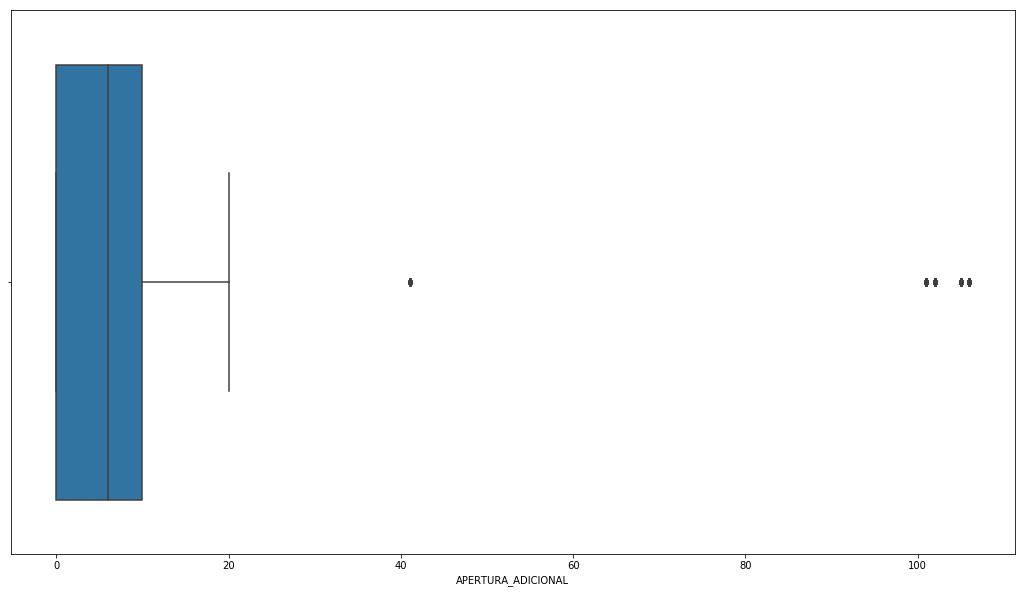

In [35]:
sns.boxplot(ventas_df["APERTURA_ADICIONAL"].astype(np.float));
plt.show()

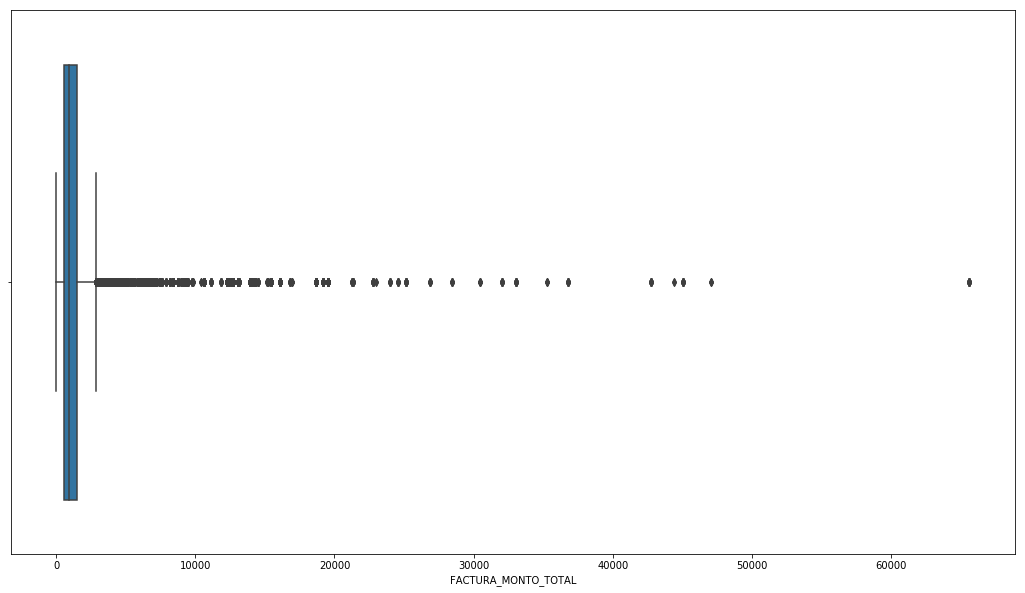

In [36]:
sns.boxplot(ventas_df["FACTURA_MONTO_TOTAL"].astype(np.float));
plt.show()

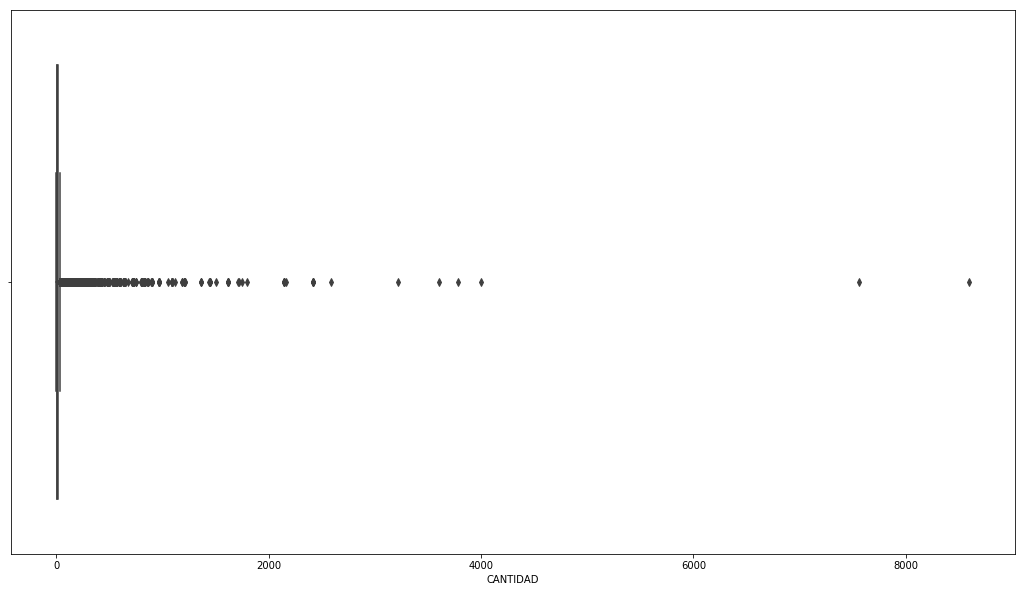

In [37]:
sns.boxplot(ventas_df["CANTIDAD"].astype(np.float));
plt.show()

##### En esos boxplots podemos advertir que existen puntos muy alejados de la media, y son malos porque "ensucian" el dataset. Pueden ser errores en la carga de datos, o datos que pertenecen a otra población, por lo que procederemos a quitarlos. Hay varias tecnicas para quitar outliers, como sacar las que se alejen por mas de tres desviaciones standar. O las que superen un valor dado.

In [38]:
outliers_cantidad = ventas_df[ventas_df.CANTIDAD > 50000]
# ahora los removemos del dataset original
ventas_df = ventas_df.drop(outliers_cantidad.index)
outliers_monto_total = ventas_df[ventas_df.FACTURA_MONTO_TOTAL > 500000]
ventas_df = ventas_df.drop(outliers_monto_total.index)


In [30]:
outliers_apertura_adicional = ventas_df[ventas_df.APERTURA_ADICIONAL.astype(np.float) > 20]
ventas_df = ventas_df.drop(outliers_apertura_adicional.index)

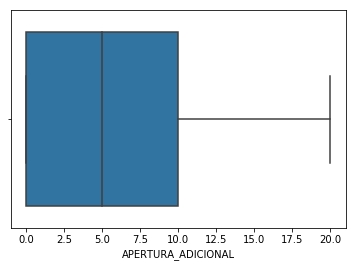

In [31]:
# volvemos a grafical los boxplots
sns.boxplot(ventas_df["APERTURA_ADICIONAL"].astype(np.float));
plt.show()

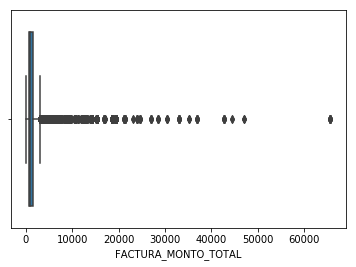

In [32]:
sns.boxplot(ventas_df["FACTURA_MONTO_TOTAL"].astype(np.float));
plt.show()

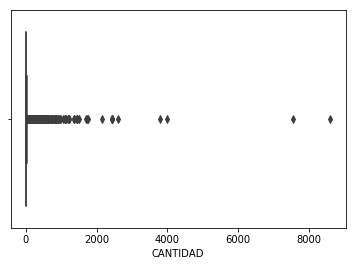

In [33]:
sns.boxplot(ventas_df["CANTIDAD"].astype(np.float));
plt.show()

# 2.G. Evaluar cómo comprimir los datos para su almacenamiento más eficiente


#### Comprimir los datos y guardar el set de datos con un nombre informativo.
Leyendo sobre el funcion de pandas.Dataframe.to_csv, esta cuenta con una función para comprimir el archivo 
y cuanta con varios metodos de compresion, nosotros elegimos gzip

# 2.H. Guardar el set de datos con un nombre informativo.

In [35]:
ventas_df.to_csv('./datos/datos-revisados-clientes.gz', compression='gzip')

In [36]:
ventas_df.columns

Index(['indice', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'],
      dtype='object')

# 3. PASOS DESEABLES:

# 3.A.Ordenar variables/columnas si es posible – primero ID, luego en el mismo orden que la fuente

In [37]:
ventas_df = ventas_df.sort_values(['indice', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'], ascending=True )

In [38]:
ventas_df.head()

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
59,59,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-7390,001,035,035,001,004,001,50.00,1,35.27,42.68
60,60,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-2528,001,035,035,001,004,001,50.00,1,34.48,41.72
61,61,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-3081,001,050,050,001,005,001,1.00,1,75.96,91.91
62,62,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-9567,003,170,205,003,032,001,4.00,2,11.14,53.94
63,63,277a4b3e81c209ef73ba08ee700f5a49,3ebb7e3a7b0c15e8e073781758141e0e,a59cb7c9166f4fce07d0a75046a966d4,3,000,000,000,000,3,01,999,00,269.41,0,03,False,0,0020104003,0,0,0,4,2,0de71e5950178d1b5e4e950d2250084e,207,2017-01-02 00:00:00,288.06,00,027,000-000-6803,075,545,932,012,077,001,3.00,2,15.93,57.81


# 3.B. Quitar variables/columnas que no tienen información a analizar

Buscamos las columnas que no poseen datos o no poseen variedad:

In [47]:
ventas_df.describe(include='all')

,indice,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,ZONA,ZONA_REPARTO,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,LISTA_PRECIOS,AGENTE_RETENCION,DIAS_TOLERANCIA_COBRO,GRUPO,SOCIEDAD_JURIDICA,ESTADO,MOTIVO_ESTADO,ESQUEMA_COMERCIAL,FACTURA_CODIGO,FACTURA_NUM_ID,FACTURA_SUCURSAL,FACTURA_FECHA,FACTURA_MONTO_TOTAL,FACTURA_COND_VENTA,FACTURA_VENDEDOR,CODIGO_ARTICULO,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL,bad_char
count,"72,920.00",72920,72920,72920,"72,920.00",72920,72920,72920,72920,"72,920.00",72920,72920,72920,"72,920.00","72,920.00",72920,72920,"72,920.00",72920,"72,920.00","72,920.00","72,920.00","72,920.00","72,920.00",72920,"72,920.00",72920,"72,920.00",72920,72920,72920,72920,72920,72920,72920,72920,72920,"72,920.00","72,920.00","72,920.00","72,920.00","72,920.00"
unique,nan,238,236,191,nan,2,5,9,9,nan,5,1,4,nan,nan,11,2,nan,235,nan,nan,nan,nan,nan,7072,nan,293,nan,5,22,1297,10,162,285,5,76,3,nan,nan,nan,nan,nan
top,nan,a4fcb6533daed839f823460ca0abf6d9,5082890637c1d3147b7fa0b8778bc9d2,6505d3facde2c86923a7339db59a21ec,nan,000,000,000,000,nan,15,999,00,nan,nan,03,False,nan,0000002051,nan,nan,nan,nan,nan,51f4542e91b3da7f6c8f2d04881ae5e3,nan,2017-06-06 00:00:00,nan,00,033,000-000-6805,012,265,050,012,061,001,nan,nan,nan,nan,nan
freq,nan,4916,4916,13313,nan,71455,32415,32415,32415,nan,43670,72920,59730,nan,nan,30607,72781,nan,4916,nan,nan,nan,nan,nan,48,nan,878,nan,58006,9161,1197,16035,3797,2569,32339,7290,72270,nan,nan,nan,nan,nan
mean,"562,506.27",NaN,NaN,NaN,2.36,NaN,NaN,NaN,NaN,1.70,NaN,NaN,NaN,"2,113.66",0.00,NaN,NaN,0.62,NaN,0.21,0.00,0.06,1.86,1.60,NaN,203.28,NaN,"1,314.47",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.34,1.69,28.88,103.93,0.00
std,"390,870.30",NaN,NaN,NaN,0.78,NaN,NaN,NaN,NaN,1.37,NaN,NaN,NaN,"2,380.36",0.00,NaN,NaN,1.21,NaN,0.41,0.00,0.23,1.26,1.13,NaN,33.37,NaN,"2,056.61",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.82,0.46,78.74,330.92,0.00
min,59.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.00,NaN,46.00,NaN,6.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00,0.00,0.04,0.00
25%,"228,085.75",NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,371.77,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,1.00,0.00,NaN,207.00,NaN,564.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,1.00,8.94,41.72,0.00
50%,"503,959.50",NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,2.00,NaN,NaN,NaN,902.75,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,1.00,2.00,NaN,207.00,NaN,938.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,2.00,13.74,65.53,0.00
75%,"838,346.25",NaN,NaN,NaN,3.00,NaN,NaN,NaN,NaN,3.00,NaN,NaN,NaN,"3,717.09",0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,3.00,2.00,NaN,207.00,NaN,"1,524.22",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,2.00,37.84,100.22,0.00


Se puede ver que ZONA_REPARTO tiene un solo valor (unico). Lo visualizamos mejor:

In [48]:
ventas_df.ZONA_REPARTO.unique()

array(['999'], dtype=object)

Eliminamos entonces el 'Feature' no útil:

In [49]:
ventas_df = ventas_df.drop(columns='ZONA_REPARTO')

# 3.C. Renombrar variables de grillas

No se detectaron.

# 3.D. Categorizar resultados en “Otros” Si tiene un campo de texto libre asociado, codificar en nuevos valores de la variable categórica asociada. Revisar fuzzyness.

No se detectaron.

# 3.E. Agregar metadata a los datos: cuando y como fueron obtenidos, limpieza realizada, asunciones, etc Vincular con etiquetas del código fuente y los datos. Al menos incluir un README.

Se agrega en el directorio un archivo README.md indicando los pasos.

# Realizamos el guardado final:

In [50]:
ventas_df.to_csv('./datos/datos-revisados-clientes.gz', compression='gzip')